In [1]:
import pandas
import os
import numpy
from matplotlib import pyplot

In [2]:
# The name of this project or barcode run.
project_name = os.path.basename(os.getcwd())

In [3]:
# Common part of all paths to be defined.
root_path = '/home/grotec/Repositories/lineage-tracking/'

In [4]:
# Location of experimental data (bartender output.)
path_to_experimental_data = os.path.join(
    root_path,
    'data/barcode_frequencies/LTtest/experimental_cluster.txt'
)

In [5]:
# Read in the data.
raw = pandas.read_csv(path_to_experimental_data, index_col=0)

In [6]:
# Describe the dataset.
raw.describe()

,Cluster.Score,time_point_1,time_point_2,time_point_3,time_point_4,time_point_5,time_point_6,time_point_7,time_point_8,time_point_9,time_point_10
count,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000,7222.000000
mean,0.089177,18.207837,18.416367,11.345888,3.817641,2.315425,2.487400,2.719884,2.750208,2.583079,2.666713
std,0.226758,27.647621,28.991690,28.006231,82.946209,48.387623,59.059377,43.421721,74.680555,89.492423,88.845394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,11.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,24.000000,25.000000,15.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1018.000000,1084.000000,1017.000000,6284.000000,3049.000000,2628.000000,2079.000000,4031.000000,6936.000000,6892.000000


In [8]:
# Take a look at the data.
raw.head()

,Center,Cluster.Score,time_point_1,time_point_2,time_point_3,time_point_4,time_point_5,time_point_6,time_point_7,time_point_8,time_point_9,time_point_10
Cluster.ID,,,,,,,,,,,,
1,ATGTGT,0.088880,12,13,12,2,2,1,8,0,8,31
2,AGGGAC,0.000000,18,8,7,0,0,0,0,0,0,1
3,TTACTT,0.036041,93,100,45,11,5,0,4,2,2,1
4,ATTCCG,0.000000,117,131,63,13,0,3,7,0,2,4
5,GCAGGC,0.802353,12,14,15,2,0,1,0,0,0,1


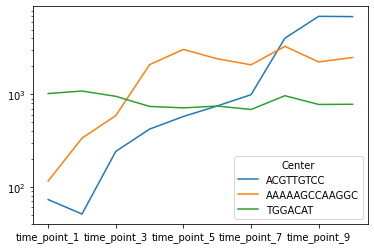

In [9]:
# Plot most abundant lineages.
counts = raw.loc[:,"time_point_1":]
counts.index = raw["Center"]
fig, ax = pyplot.subplots()
counts.sort_values(by="time_point_10", ascending=False).head(3).T.plot(ax=ax, logy=True)

In [10]:
# Sum up the number of reads for each timepoint.
total_reads_per_timepoint = raw.loc[:,"time_point_1":].sum(axis=0)

In [11]:
total_reads_per_timepoint

time_point_1     131497
time_point_2     133003
time_point_3      81940
time_point_4      27571
time_point_5      16722
time_point_6      17964
time_point_7      19643
time_point_8      19862
time_point_9      18655
time_point_10     19259
dtype: int64

In [12]:
# Normalize data to total number of reads -> frequencies.
frequencies = raw.loc[:,"time_point_1":]/total_reads_per_timepoint.T

In [13]:
frequencies

,time_point_1,time_point_2,time_point_3,time_point_4,time_point_5,time_point_6,time_point_7,time_point_8,time_point_9,time_point_10
Cluster.ID,,,,,,,,,,
1,0.000091,0.000098,0.000146,0.000073,0.000120,0.000056,0.000407,0.000000,0.000429,0.001610
2,0.000137,0.000060,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052
3,0.000707,0.000752,0.000549,0.000399,0.000299,0.000000,0.000204,0.000101,0.000107,0.000052
4,0.000890,0.000985,0.000769,0.000472,0.000000,0.000167,0.000356,0.000000,0.000107,0.000208
5,0.000091,0.000105,0.000183,0.000073,0.000000,0.000056,0.000000,0.000000,0.000000,0.000052
...,...,...,...,...,...,...,...,...,...,...
7218,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7219,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7220,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


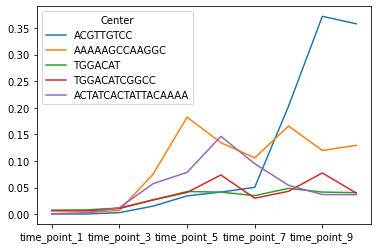

In [14]:
# Plot most abundant lineages.
fig, ax = pyplot.subplots()
frequencies.index = raw["Center"]
frequencies.sort_values(by="time_point_10", ascending=False).head(5).T.plot(ax=ax)

## Rearange data input format for bc analysis pipeline

In [30]:
# Define the number of epochs to split the data into.
no_epochs = 5

# How many generations pass between two sample timepoints.
no_generations_per_timepoint = 10

# Make a list of timepoints in units of generations.
timepoints = no_generations_per_timepoint*numpy.array(range(frequencies.shape[1]))

In [33]:
number_of_timepoints_per_epoch = len(timepoints)//no_epochs

In [34]:
number_of_timepoints_per_epoch

2

In [35]:
# Loop over all epochs.
epoch_start_timepoint_index = 0 
for epoch in range(no_epochs):
    
    # Take all timepoints from the beginning of this epoch to the end of the series.
    ets = timepoints[epoch_start_timepoint_index:]
    
    
    # Barcode headers for the table.
    bc_headers = ["BC{0:d}".format(i) for i in range(1,epoch+2)]
    
    # All column headers.
    columns = ["POP"] + bc_headers + ["{}".format(et) for et in ets]
    out = pandas.DataFrame(index=raw.index,
                           columns=columns,
                          )
    
    # Dummy population index.
    out['POP'] = ['AAAAAAAAAAA']*len(raw.index)
    for bch in bc_headers:
        out[bch] = raw['Center']
        
    # Column index where the data for this epoch starts in the final dataframe.
    data_start_icolumn = 2+epoch
    
    # Column index where the data for this epoch starts in the raw data.
    frequencies_start_icolumn = epoch_start_timepoint_index
    
    # Copy the data.
    out.iloc[:,data_start_icolumn:] = frequencies.iloc[:,frequencies_start_icolumn:].to_numpy()
    
    epoch_start_timepoint_index += number_of_timepoints_per_epoch

    # Store as new csv in a project directory .
    out.to_csv(
        os.path.join(
            root_path,
            'data/barcode_frequencies/{0:s}/{0:s}-BC{1:d}_frequencies.txt'.format(
                project_name,
                epoch+1
            )
        ),
        index=False,
        sep="\t",
    )
    
    # Write the total reads.
    if epoch == 0:
        total_reads_per_timepoint.index = out.columns[2:]
        total_reads_per_timepoint.to_csv(
            os.path.join(
                root_path,
                'data/barcode_frequencies/{0:s}/{0:s}_read_coverage.txt'.format(
                project_name,
                )
            ),
            header=None,
            sep="\t"
        )